# Session Duration

In [1]:
#libs
import os
import re
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import glob
import math

In [41]:
# HOME

def find_txt_files(folder_path):

    txt_files_paths = []
    
    # Check for .txt files in the root folder
    txt_files_paths.extend(glob.glob(os.path.join(folder_path, '*.txt')))
    
    # Get all items in the root folder
    for item in os.listdir(folder_path):
        # Construct the full path of the item
        item_path = os.path.join(folder_path, item)
        # Check if this item is a directory and not in the exclude list
        if os.path.isdir(item_path):
            # If it's a directory, search for .txt files in it
            txt_files_paths.extend(glob.glob(os.path.join(item_path, '*.txt')))    
    
    return txt_files_paths

In [42]:
txt_path_list_3C280 = find_txt_files(r'C:\Users\teamROUXadmin\Desktop\3c280')

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\teamROUXadmin\\Desktop\\3c280'

In [45]:
txt_path_list_3C280

['C:\\Users\\teamROUXadmin\\Desktop\\3c280\\3C280_S32_240315_114016.txt',
 'C:\\Users\\teamROUXadmin\\Desktop\\3c280\\3C280_S32_240315_120027.txt',
 'C:\\Users\\teamROUXadmin\\Desktop\\3c280\\3C280_S32_240315_131515.txt',
 'C:\\Users\\teamROUXadmin\\Desktop\\3c280\\3C280_S32_240315_135443.txt']

In [25]:
# LAB
def find_txt_files(folder_path, exclude_folders=None):
    # Initialize the exclude_folders list if it wasn't provided
    if exclude_folders is None:
        exclude_folders = [
            r'L:\everyone\sharedDATA\RawDATA\3C280\3C280_S08_NoRec',
            r'L:\everyone\sharedDATA\RawDATA\3C280\Rubbish'
        ]
    
    # This list will store the paths of .txt files
    txt_files_paths = []
    
    # Check for .txt files in the root folder
    txt_files_paths.extend(glob.glob(os.path.join(folder_path, '*.txt')))
    
    # Get all items in the root folder
    for item in os.listdir(folder_path):
        # Construct the full path of the item
        item_path = os.path.join(folder_path, item)
        # Check if this item is a directory and not in the exclude list
        if os.path.isdir(item_path) and item_path not in exclude_folders:
            # If it's a directory, search for .txt files in it
            txt_files_paths.extend(glob.glob(os.path.join(item_path, '*.txt')))
    
    return txt_files_paths

In [3]:
dir3C280 = r"L:\everyone\sharedDATA\RawDATA\3C280"
txt_path_list_3C280 = find_txt_files(dir3C280)


In [26]:
txt_path_list_3C280_old = txt_path_list_3C280[-40:-16] # sessions 28-33

In [27]:
txt_path_list_3C280_new = txt_path_list_3C280[-16:-4] # sessions 34,35,36

In [28]:
txt_path_list_3C280_new

['L:\\everyone\\sharedDATA\\RawDATA\\3C280\\3C280_S34_240319_111247\\3C280_S34_240319_111247.txt',
 'L:\\everyone\\sharedDATA\\RawDATA\\3C280\\3C280_S34_240319_113140\\3C280_S34_240319_113140.txt',
 'L:\\everyone\\sharedDATA\\RawDATA\\3C280\\3C280_S34_240319_123256\\3C280_S34_240319_123256.txt',
 'L:\\everyone\\sharedDATA\\RawDATA\\3C280\\3C280_S34_240319_124902\\3C280_S34_240319_124902.txt',
 'L:\\everyone\\sharedDATA\\RawDATA\\3C280\\3C280_S35_240320_103146\\3C280_S35_240320_103146.txt',
 'L:\\everyone\\sharedDATA\\RawDATA\\3C280\\3C280_S35_240320_105355\\3C280_S35_240320_105355.txt',
 'L:\\everyone\\sharedDATA\\RawDATA\\3C280\\3C280_S35_240320_120353\\3C280_S35_240320_120353.txt',
 'L:\\everyone\\sharedDATA\\RawDATA\\3C280\\3C280_S35_240320_123352\\3C280_S35_240320_123352.txt',
 'L:\\everyone\\sharedDATA\\RawDATA\\3C280\\3C280_S36_240321_123648\\3C280_S36_240321_123648.txt',
 'L:\\everyone\\sharedDATA\\RawDATA\\3C280\\3C280_S36_240321_130114\\3C280_S36_240321_130114.txt',
 'L:\\ever

In [ ]:
# 2024-02-21 18:56:40
# 2024-02-21 18:56:40	al # 26 after 5 s
# 12:29:17.764 
# 13:00:12.804	Start Trial # 41 after

In [56]:
def duration_20t(file_path, trial_numbers=[1,21]): # Trial numbers to find
    trial_1_21 = []

    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split('\t')
            if len(parts) >= 2:
                try:
                    try:
                        pattern = "%H:%M:%S.%f"
                        timestamp = datetime.strptime(parts[0], pattern)
                        event = parts[1]
                    except:
                        pattern = "%H:%M:%S"
                        timestamp = datetime.strptime(parts[0], pattern)
                        event = parts[1]
                except:
                    continue
                
                for i in range(len(trial_numbers)):
                    if f'Start Trial # {trial_numbers[i]} ' in event:
                        trial_1_21.append(timestamp)

    duration_t1_t21 = trial_1_21[1] - trial_1_21[0]
    duration_t1_t21 = duration_t1_t21.total_seconds() / 60

    return duration_t1_t21 #in mins

In [33]:
file_path = r'L:\\everyone\\sharedDATA\\RawDATA\\3C280\\3C280_S34_240319_111247\\3C280_S34_240319_111247.txt'
tr_dur = duration_20t(file_path)
tr_dur

6.359033333333333

In [43]:
def blocks_matrix(txt_files_paths):
    blocks_matrix = []
    s_x = []

    txt_files_paths.append('L:\\everyone\\sharedDATA\\RawDATA\\3C280\\3C280_S34_240319_111247\\3C280_S34_240319_111247.txt')
    for path in txt_files_paths:
        match = re.search(r'_S(\d+)_', path)
        number = match.group(1)
        if number not in s_x:
            try:
                blocks_matrix.append(s_x)
                s_x=[]
                s_x.append(number)
                s_x.append(duration_20t(path))
            except:
                continue
        else:
            s_x.append(duration_20t(path))

    max_len = 5 # s_nb, block1,2,3,4
    for sublist in blocks_matrix:
        while len(sublist) < max_len:
            sublist.append(np.nan)
    
    blocks_matrix = np.array(blocks_matrix)[1:,:]
    blocks_matrix = blocks_matrix.astype(float)

    return blocks_matrix


In [44]:
blocks_matrix_3C280_old = blocks_matrix(txt_path_list_3C280_old)

In [45]:
blocks_matrix_3C280_old

array([[28.        , 31.6305    , 10.28876667, 26.35548333, 37.61978333],
       [29.        ,  7.20488333, 20.77036667, 11.1656    , 25.79941667],
       [30.        ,  6.35381667, 24.15765   ,  9.32726667, 22.0497    ],
       [31.        ,  5.95708333, 17.33815   , 29.06246667, 26.41693333],
       [32.        ,  9.31783333, 19.19615   , 19.98081667, 19.90001667],
       [33.        ,  5.07596667, 12.9247    , 11.40346667, 22.84933333]])

In [46]:
blocks_matrix_3C280_new = blocks_matrix(txt_path_list_3C280_new)

In [57]:
blocks_matrix_3C280 = blocks_matrix(txt_path_list_3C280)

IndexError: list index out of range

In [41]:
def subsession_plot(matrix, mouse, save=False):
    for i in range(len(matrix)):
        session_name = int(matrix[i,0])
        durations = matrix[i,1:]
        plt.plot(range(1, len(durations) + 1), durations, marker='o', label=f"S{session_name}", color='blue', alpha=1/(i+1))
        # alpha= i/ len(matrix)

    plt.xlabel('Block')
    plt.ylabel('Duration (min)')
    plt.title(f'Time to complete 20 trials in each block by {mouse} mouse')
    plt.legend()
    plt.grid(True)
    plt.xticks([1, 2, 3, 4])
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    # plt.ylim(0, 150)
    # plt.yticks(range(0, 151, 10))
    # plt.tight_layout()
    plt.show() 
    if save==True:
        plt.savefig('ses_durations.png', dpi=300)

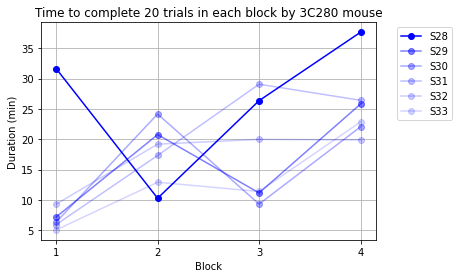

In [42]:
subsession_plot(blocks_matrix_3C280_old, mouse='3C280')

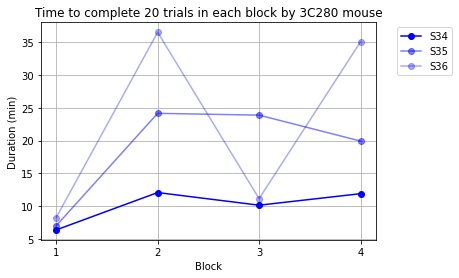

In [47]:
subsession_plot(blocks_matrix_3C280_new, mouse='3C280')

In [59]:
import random

In [69]:
[random.randint(10, 140) for _ in range(4)]

[17, 38, 82, 118]

In [29]:
toy_matrix = np.array([[33,10,15,17,50],
              [34,50, 94, 42, 132],
              [35,103, 10, 87, 67],
              [36,97, 14, 16, 128],
              [37,29, 33, 15, 90],
              [38,14, 125, 95, 113],
              [39,88, 73, 99, 66],
              [40,57, 64, 84, 10],
              [41,13, 101, 67, 25],
              [42,102, 87, 124, 76],
              [43,17, 38, 82, 118]])

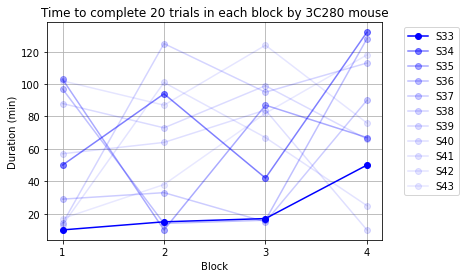

In [30]:
subsession_plot(toy_matrix, mouse='3C280')

### Block 1 vs 2

In [50]:
def bl_bl_plot(matrix, mouse='3C280', block_x=1, block_y=2, save=False):
    
    plt.figure(figsize=(5,5))
    # lines with dots
    for i in range(len(matrix)):
        durations = matrix[i,block_x:block_y+1]
        plt.plot(range(len(durations)), durations, marker='o',color='black', alpha=0.5)
    # bar plot
    labels = [f'Block {block_x}', f'Block {block_y}']
    means = [np.mean(matrix[:,block_x]), np.mean(matrix[:,block_y])] 
    plt.bar(labels, means, alpha=0.3)

    plt.ylabel('Duration (min)')
    plt.title(f'Time to complete 20 trials in Block {block_x} vs Block {block_y} by {mouse} mouse')
    plt.legend()
    plt.grid(True)
    # plt.ylim(0, 150)
    # plt.yticks(range(0, 151, 10))
    plt.tight_layout()
    plt.show() 
    if save==True:
        plt.savefig('ses_durations.png', dpi=300)

No handles with labels found to put in legend.


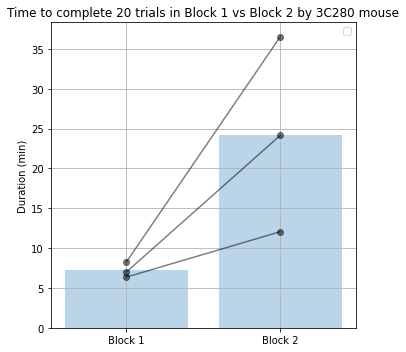

In [53]:
bl_bl_plot(blocks_matrix_3C280_new, block_x=1, block_y=2)

No handles with labels found to put in legend.


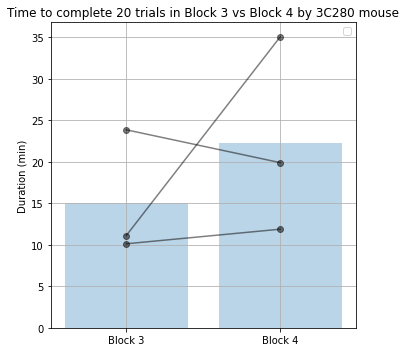

In [54]:
bl_bl_plot(blocks_matrix_3C280_new, block_x=3, block_y=4)